In [1]:
# read paramnames
import numpy as np
from getdist import MCSamples
from pathlib import Path
import glob

from pathlib import Path

def read_paramnames(directory):
    """
    Find the unique .paramnames file in a directory and return a dict
    mapping parameter names to LaTeX labels.

    Expected format per line:
        <param_name> <whitespace> <latex_label>

    Blank lines and commented lines (#) are ignored.
    """
    directory = Path(directory)

    if not directory.exists():
        raise FileNotFoundError(f"{directory} does not exist")

    if not directory.is_dir():
        raise NotADirectoryError(f"{directory} is not a directory")

    paramfiles = list(directory.glob("*.paramnames"))

    if len(paramfiles) == 0:
        raise FileNotFoundError("No .paramnames file found in directory")
    if len(paramfiles) > 1:
        raise RuntimeError(
            f"Expected exactly one .paramnames file, found {len(paramfiles)}: "
            + ", ".join(p.name for p in paramfiles)
        )

    filename = paramfiles[0]
    labels = {}

    with filename.open("r") as f:
        for line in f:
            line = line.strip()

            # skip empty lines or comments
            if not line or line.startswith("#"):
                continue

            parts = line.split()
            name = parts[0]
            latex = " ".join(parts[1:])

            labels[name] = latex

    return labels



import numpy as np
from pathlib import Path
from getdist import MCSamples

def load_samples(chain_dir, param_names):
    """
    Load MCMC samples from a directory containing:
      - exactly one .paramnames file
      - one or more .txt chain files

    Parameters
    ----------
    chain_dir : str or Path
        Directory containing the chains and the .paramnames file.
    param_names : list of str
        Parameters to extract.

    Returns
    -------
    getdist.MCSamples
    """
    chain_dir = Path(chain_dir)

    if not chain_dir.exists():
        raise FileNotFoundError(f"{chain_dir} does not exist")

    if not chain_dir.is_dir():
        raise NotADirectoryError(f"{chain_dir} is not a directory")

    # find chain files: chains are the only .txt files
    chain_files = sorted(chain_dir.glob("*.txt"))
    if not chain_files:
        raise FileNotFoundError("No .txt chain files found")

    # read paramnames from the same directory
    latex_labels = read_paramnames(chain_dir)

    # preserve param order from .paramnames
    param_indices = {
        name: i
        for i, name in enumerate(latex_labels.keys())
        if name in param_names
    }

    if not param_indices:
        raise ValueError("None of the requested parameters were found")

    all_weights = []
    all_samples_selected = []

    for chain_file in chain_files:
        try:
            data = np.loadtxt(chain_file)

            if data.ndim != 2 or data.shape[0] < 100:
                continue

            weights = data[:, 0]

            selected_cols = np.column_stack(
                [data[:, idx + 2] for idx in param_indices.values()]
            )

            all_weights.append(weights)
            all_samples_selected.append(selected_cols)

        except Exception:
            continue

    if not all_weights:
        raise RuntimeError("No valid chain files were loaded")

    weights = np.concatenate(all_weights)
    samples = np.concatenate(all_samples_selected)

    samp = MCSamples(
        samples=samples,
        weights=weights,
        names=list(param_indices.keys()),
        labels=[latex_labels[name] for name in param_indices.keys()],
        ignore_rows=0.2,
    )
    samp.setRanges({'fraction_maxion_ac__1':(0.,0.3)})
    samp.setRanges({'fraction_maxion_ac__2':(0.,0.3)})
    samp.setRanges({'fraction_maxion_ac__3':(0.,0.3)})
    samp.setRanges({'fraction_maxion_ac__4':(0.,0.3)})
    return samp

import re

def find_min_loglike(chain_dir,useProcoli=False):
    if useProcoli:
        log_file = next(Path(chain_dir).glob("global_min/*.log"))
    else:
        log_file = next(Path(chain_dir).glob("*.log"))
    pattern = re.compile(r"Minimum of -logLike\s*:\s*([0-9.+-eE]+)")

    for line in log_file.open():
        m = pattern.search(line)
        if m:
            return float(m.group(1))


In [2]:
from pathlib import Path

BASE = Path(
    "/Users/bellamarco01/uni/1_master_thesis/montepython_chains/chains_mp/varying_zc"
)

# # 1 axion
# chain_1pd  = BASE / "planck_TTTEEElensing_pantheon_plus_desi_2026-01-14"
# chain_1psd = BASE / "planck_TTTEEElensing_pantheon_plus_sh0es_desi_2026-01-14"

# # 2 axions
# chain_2pd  = BASE / "2_axions/planck_TTTEEElensing_pantheon_plus_desi_2026-01-14"
# chain_2psd = BASE / "2_axions/planck_TTTEEElensing_pantheon_plus_sh0es_desi_2026-01-14"

# # 3 axions (latest = 2026-01-16)
# chain_3pd  = BASE / "3_axions/planck_TTTEEElensing_pantheon_plus_desi_2026-01-16"
# chain_3psd = BASE / "3_axions/planck_TTTEEElensing_pantheon_plus_sh0es_desi_2026-01-16"

# # 4 axions (latest)
# chain_4pd  = BASE / "4_axions/planck_TTTEEElensing_pantheon_plus_desi_2026-01-16"
# chain_4psd = BASE / "4_axions/planck_TTTEEElensing_pantheon_plus_sh0es_desi_2026-01-14"

# 0 axions
chain_0pd  = BASE / "../0_axions/planck_TTTEEElensing_pantheon_plus_desi_2026-01-13"
chain_0psd = BASE / "../0_axions/planck_TTTEEElensing_pantheon_plus_sh0es_desi_2026-01-13"

# 1 axion
chain_1pd  = BASE / "planck_TTTEEElensing_pantheon_plus_desi_2026-01-14"
chain_1psd = BASE / "planck_TTTEEElensing_pantheon_plus_sh0es_desi_2026-01-14"

# 2 axions
chain_2pd  = BASE / "2_axions/planck_TTTEEElensing_pantheon_plus_desi_2026-01-19"
chain_2psd = BASE / "2_axions/planck_TTTEEElensing_pantheon_plus_sh0es_desi_2026-01-19"

# 3 axions (latest = 2026-01-16)
chain_3pd_old  = BASE / "3_axions/planck_TTTEEElensing_pantheon_plus_desi_2026-01-19"
chain_3psd_old = BASE / "3_axions/planck_TTTEEElensing_pantheon_plus_sh0es_desi_2026-01-19"

# 3 axions (latest = 2026-01-16)
chain_3pd  = BASE / "3_axions/v2/planck_TTTEEElensing_pantheon_plus_desi_2026-01-26"
chain_3psd = BASE / "3_axions/v2/planck_TTTEEElensing_pantheon_plus_sh0es_desi_2026-01-26"
chain_3pd_proc  = BASE / "3_axions/v2/planck_TTTEEElensing_pantheon_plus_desi_2026-01-22"
chain_3psd_proc = BASE / "3_axions/v2/planck_TTTEEElensing_pantheon_plus_sh0es_desi_2026-01-22"

# 4 axions (latest)
chain_4pd  = BASE / "4_axions/planck_TTTEEElensing_pantheon_plus_desi_2026-01-22"
chain_4psd = BASE / "4_axions/planck_TTTEEElensing_pantheon_plus_sh0es_desi_2026-01-22"

chain_4pd_v2  = BASE / "4_axions/v2/planck_TTTEEElensing_pantheon_plus_desi_2026-01-26"
chain_4psd_v2 = BASE / "4_axions/v2/planck_TTTEEElensing_pantheon_plus_sh0es_desi_2026-01-26"

chain_4pd_v2proc  = BASE / "4_axions/v2/planck_TTTEEElensing_pantheon_plus_desi_2026-01-23"
chain_4psd_v2proc = BASE / "4_axions/v2/planck_TTTEEElensing_pantheon_plus_sh0es_desi_2026-01-23"

In [23]:
#param_names = ['fraction_maxion_ac__1', 'fraction_maxion_ac__2', 'fraction_maxion_ac__3', 'log10_maxion_ac__1', 'log10_maxion_ac__2', 'log10_maxion_ac__3']
#param_names_1 = ['fraction_maxion_ac__1', 'log10_maxion_ac__1']
param_names_4 = ['fraction_maxion_ac__1', 'fraction_maxion_ac__2','fraction_maxion_ac__3', 'fraction_maxion_ac__4', 
                 'log10_maxion_ac__1', 'log10_maxion_ac__2','log10_maxion_ac__3', 'log10_maxion_ac__4']
param_names =['H0','Omega_m','sigma8','rs_star']

samp_0pd = load_samples(
     chain_0pd,
     param_names
 )
samp_0psd = load_samples(
    chain_0psd,
    param_names
)

samp_1pd = load_samples(
     chain_1pd,
     param_names
 )
samp_1psd = load_samples(
    chain_1psd,
    param_names
)

samp_2pd = load_samples(
    chain_2pd,
    param_names
)
samp_2psd = load_samples(
    chain_2psd,
    param_names_4
)

samp_3pd = load_samples(
    chain_3pd,
    param_names
)
samp_3psd = load_samples(
    chain_3psd,
    param_names_4
)

samp_4pd = load_samples(
    chain_4pd,
    param_names
)
samp_4psd = load_samples(
    chain_4psd,
    param_names_4
)

samp_4pd_v2 = load_samples(
    chain_4pd_v2,
    param_names
)
samp_4psd_v2 = load_samples(
    chain_4psd_v2,
    param_names_4
)



samp_3pd_proc = load_samples(
    chain_3pd_proc,
    param_names
)
samp_3psd_proc = load_samples(
    chain_3psd_proc,
    param_names
)

samp_4pd_v2proc = load_samples(
    chain_4pd_v2proc,
    param_names
)
samp_4psd_v2proc = load_samples(
    chain_4psd_v2proc,
    param_names
)



Removed 0.2 as burn in
Removed 0.2 as burn in
Removed 0.2 as burn in
Removed 0.2 as burn in
Removed 0.2 as burn in
Removed 0.2 as burn in
Removed 0.2 as burn in
Removed 0.2 as burn in
Removed 0.2 as burn in
Removed 0.2 as burn in
Removed 0.2 as burn in
Removed 0.2 as burn in
Removed 0.2 as burn in
Removed 0.2 as burn in
Removed 0.2 as burn in
Removed 0.2 as burn in


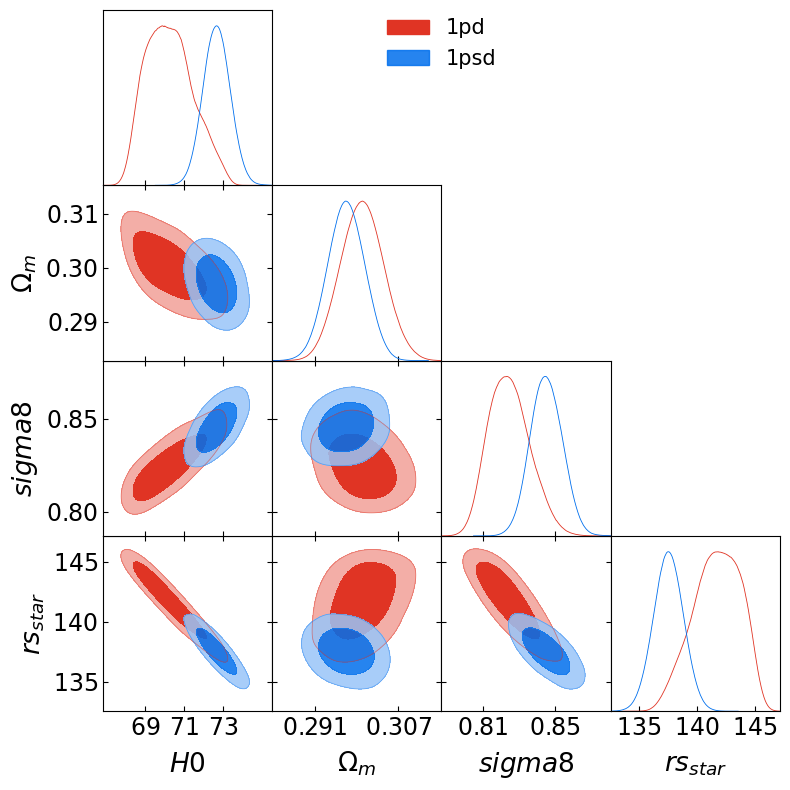

In [4]:
from getdist import plots
import matplotlib.pyplot as plt

g = plots.get_subplot_plotter()

# Make all text bigger
g.settings.axes_fontsize = 20     # tick labels
g.settings.lab_fontsize = 22      # axis labels
g.settings.legend_fontsize = 18   # legend
g.settings.figure_legend_frame = False  # optional, cleaner look

g.triangle_plot(
    [samp_1pd, samp_1psd],
    params=param_names,
    filled=True,
    legend_labels=[
        "1pd",
        "1psd"
    ]
)

plt.show()


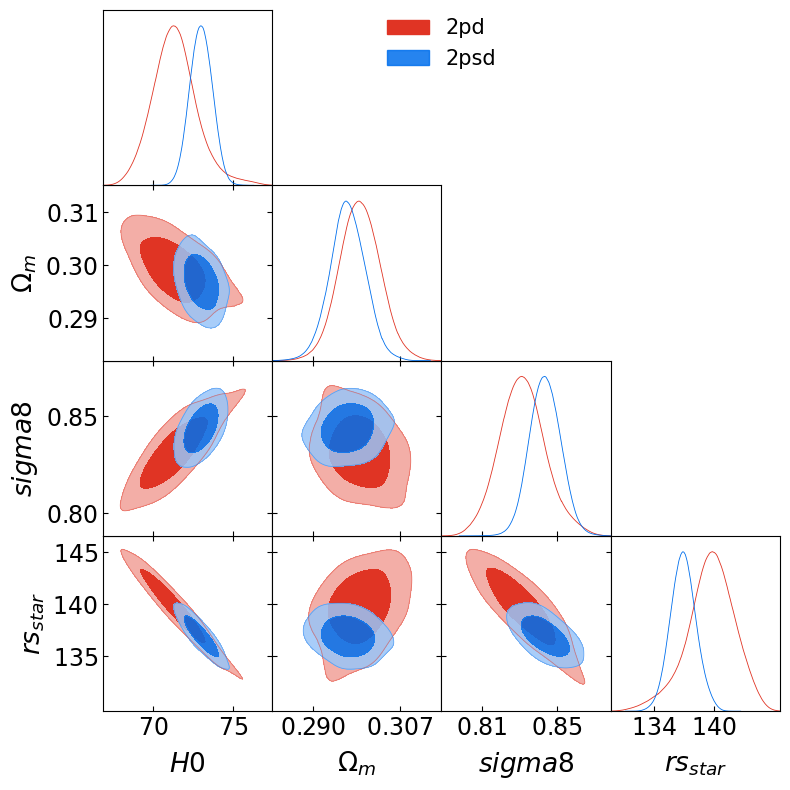

In [5]:

g.triangle_plot(
    [samp_2pd, samp_2psd],
    params=param_names,
    filled=True,
    legend_labels=[
        "2pd",
        "2psd"
    ]
)

plt.show()


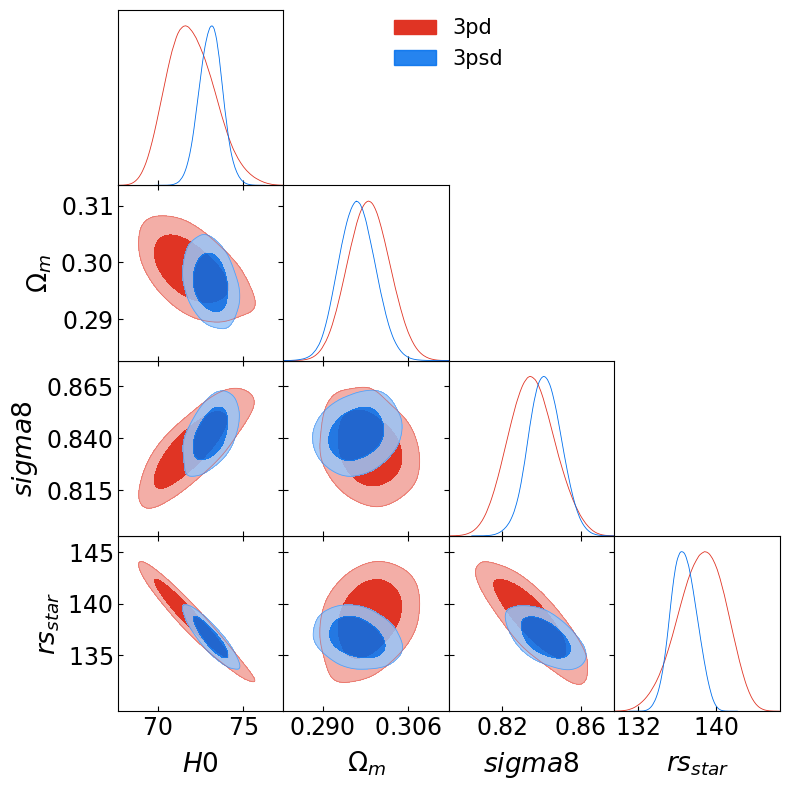

In [6]:
g.triangle_plot(
    [samp_3pd, samp_3psd],
    params=param_names,
    filled=True,
    legend_labels=[
        "3pd",
        "3psd"
    ]
)

plt.show()


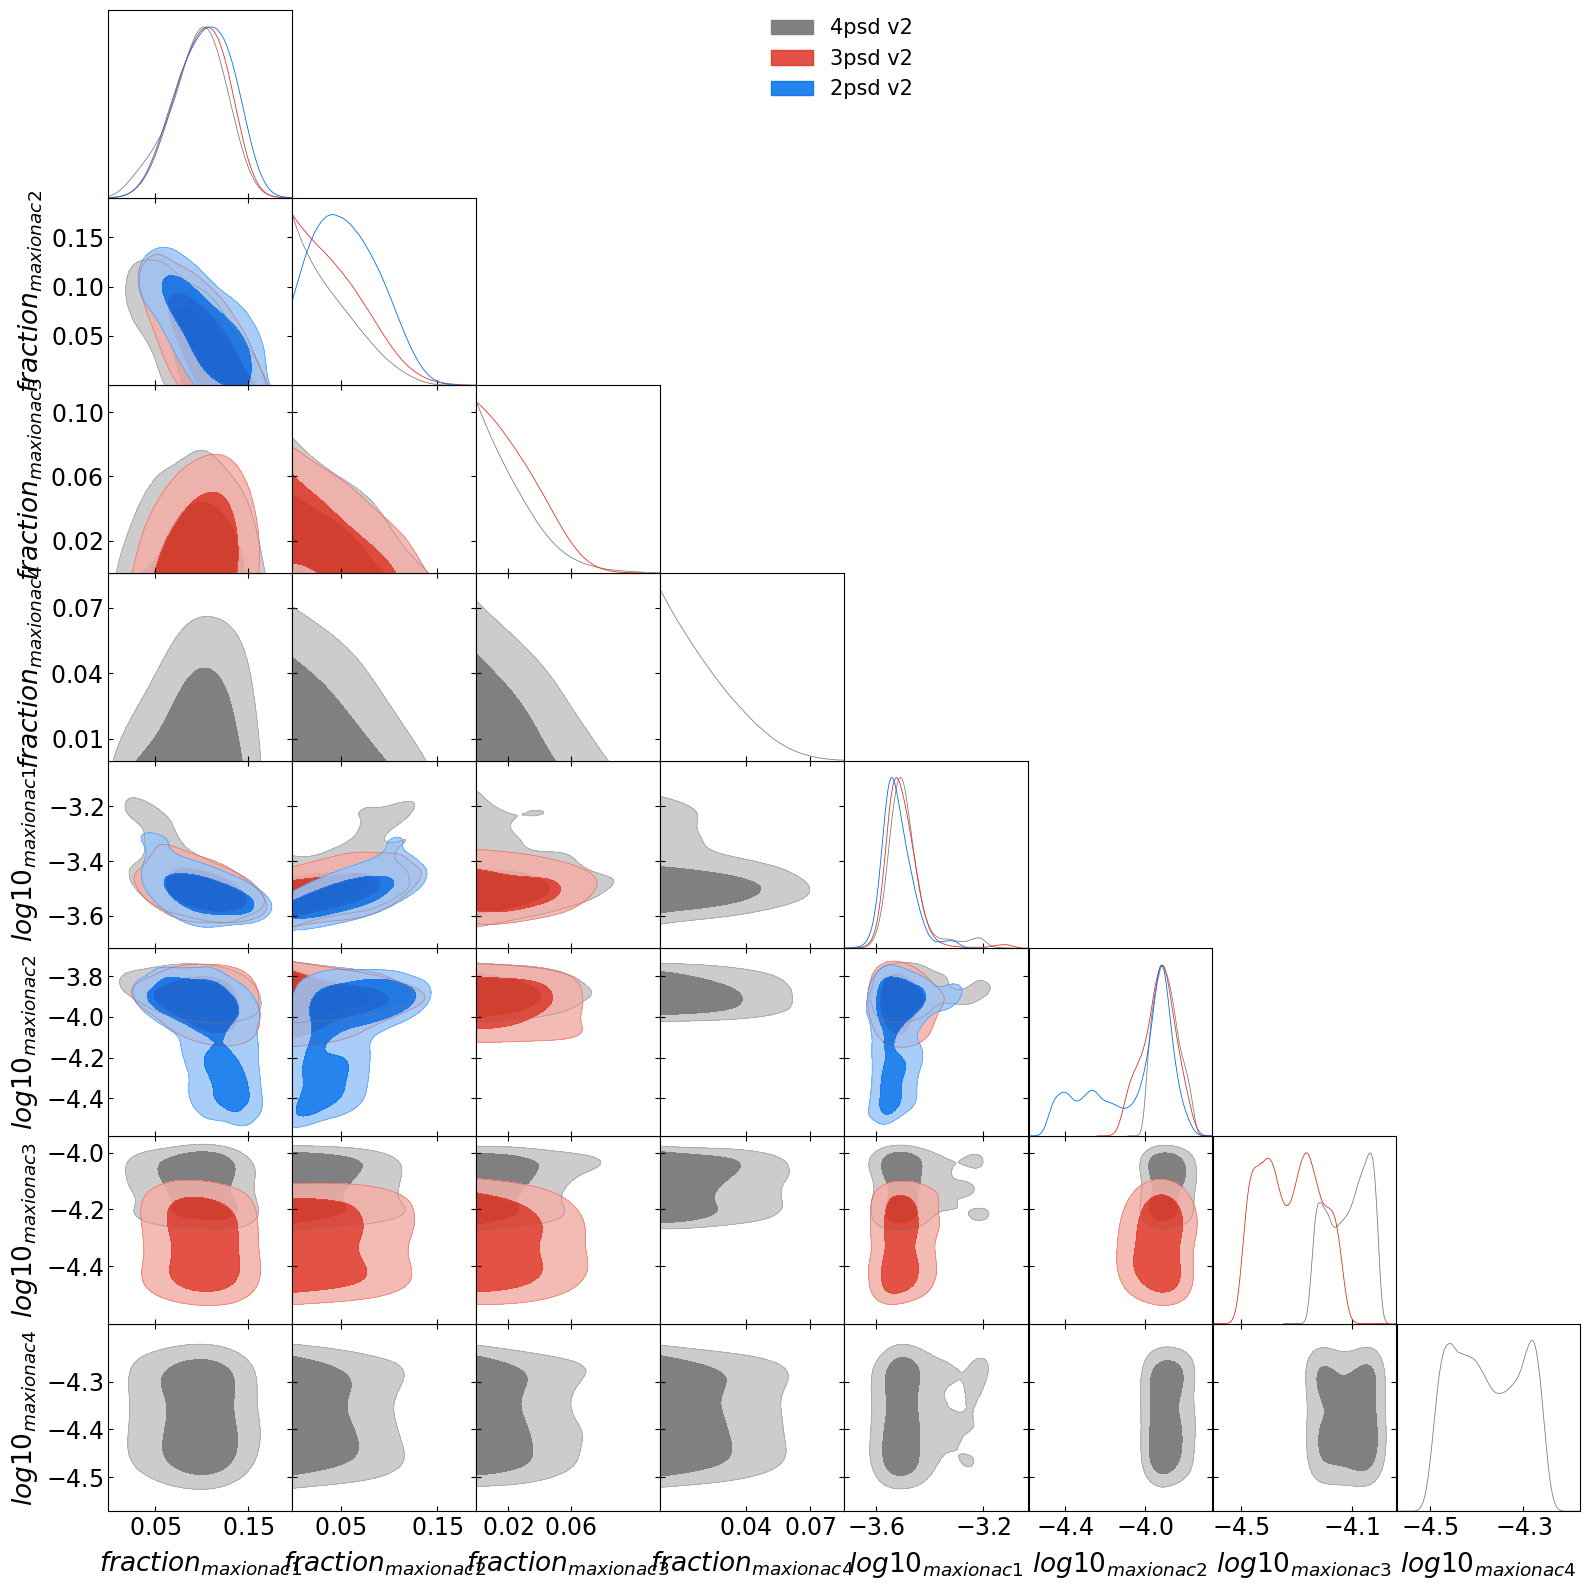

In [24]:

g.triangle_plot(
    [samp_4psd_v2,samp_3psd,samp_2psd],
    params=param_names_4,
    filled=True,
    legend_labels=[
        "4psd v2",
        "3psd v2",
        "2psd v2"
    ]
)

plt.show()



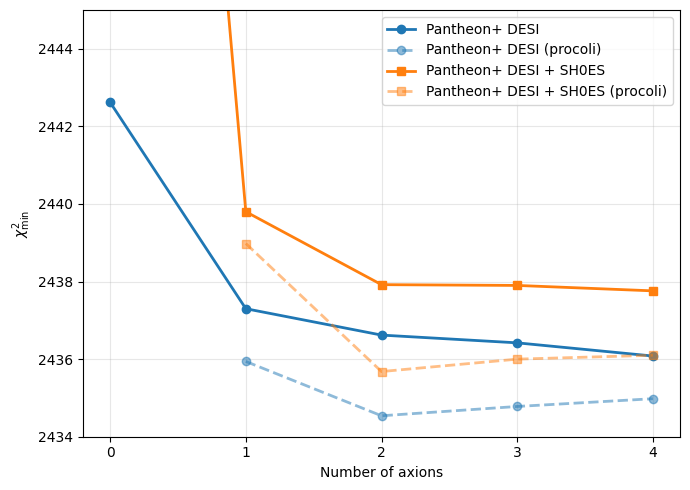

In [27]:
min_loglike_pd = []
min_loglike_pd_procoli = []
min_loglike_psd = []
min_loglike_psd_procoli = []
chains_pd = [chain_0pd,chain_1pd, chain_2pd, chain_3pd, chain_4pd]
chains_psd = [chain_0psd,chain_1psd, chain_2psd, chain_3psd, chain_4psd]
chains_pd_proc = [chain_0pd,chain_1pd, chain_2pd, chain_3pd_proc, chain_4pd_v2proc]
chains_psd_proc = [chain_0psd,chain_1psd, chain_2psd, chain_3psd_proc, chain_4psd]
for i in range(5):
    chain_pd = chains_pd[i]
    chain_psd = chains_psd[i]
    chain_pd_proc = chains_pd_proc[i]
    chain_psd_proc = chains_psd_proc[i]
    min_loglike_pd.append(find_min_loglike(chain_pd))
    min_loglike_psd.append(find_min_loglike(chain_psd))
    ####no procoli for 4psd yet###
    try:
        min_loglike_pd_procoli.append(find_min_loglike(chain_pd_proc,useProcoli=True))
        min_loglike_psd_procoli.append(find_min_loglike(chain_psd_proc,useProcoli=True))
    except:
        min_loglike_pd_procoli.append(np.nan)       
        min_loglike_psd_procoli.append(np.nan)       

n_axions = np.arange(0, 5)
# convert to chi^2
chi2_pd  = 2 * np.array(min_loglike_pd)
chi2_pd_procoli  = 2 * np.array(min_loglike_pd_procoli)
chi2_psd = 2 * np.array(min_loglike_psd)
chi2_psd_procoli  = 2 * np.array(min_loglike_psd_procoli)

plt.figure(figsize=(7, 5))

min=0
max=5
# Pantheon+ DESI
plt.plot(
    n_axions[min:max],
    chi2_pd[min:max],
    color="C0",
    marker="o",
    lw=2,
    label="Pantheon+ DESI"
)

plt.plot(
    n_axions[min:max], 
    chi2_pd_procoli[min:max],
    color="C0",
    marker="o",
    lw=2,
    linestyle="--",
    alpha=0.5,
    label="Pantheon+ DESI (procoli)"
)

# Pantheon+ DESI + SH0ES
plt.plot(
    n_axions[min:max],
    chi2_psd[min:max],
    color="C1",
    marker="s",
    lw=2,
    label="Pantheon+ DESI + SH0ES"
)

plt.plot(
    n_axions[min:max],
    chi2_psd_procoli[min:max],
    color="C1",
    marker="s",
    lw=2,
    linestyle="--",
    alpha=0.5,
    label="Pantheon+ DESI + SH0ES (procoli)"
)

plt.xlabel("Number of axions")
plt.ylabel(r"$\chi^2_{\mathrm{min}}$")
plt.xticks(n_axions)
plt.legend()
plt.grid(alpha=0.3)
plt.ylim(2434,2445)
plt.tight_layout()
plt.show()


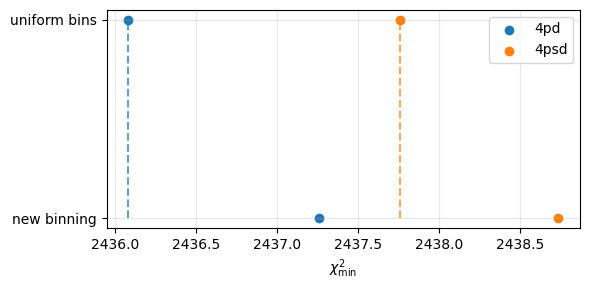

In [9]:

min_loglike_v1 =  [find_min_loglike(chain_4pd, useProcoli=False), find_min_loglike(chain_4psd, useProcoli=False)]
min_loglike_v2 =  [find_min_loglike(chain_4pd_v2, useProcoli=False), find_min_loglike(chain_4psd_v2, useProcoli=False)]
# Convert to chi2
chi2_v1 = 2 * np.array(min_loglike_v1)
chi2_v2 = 2 * np.array(min_loglike_v2)

# y positions for categories
y_pos = [1, 0]  # v1 on top, v2 below

# Width to separate the two datasets on y-axis
offset = 0.0

fig, ax = plt.subplots(figsize=(6,3))

# Plot each dataset
ax.scatter(chi2_v1[0], y_pos[0]+offset, color='C0', label='4pd')
ax.scatter(chi2_v1[1], y_pos[0]-offset, color='C1', label='4psd')

ax.scatter(chi2_v2[0], y_pos[1]+offset, color='C0')
ax.scatter(chi2_v2[1], y_pos[1]-offset, color='C1')

# y-axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(['uniform bins', 'new binning'])
ax.vlines(x=[chi2_v1[0]], ymin=y_pos[1]+offset, ymax=y_pos[0]+offset, color='C0', linestyle='--', alpha=0.7)
ax.vlines(x=[chi2_v1[1]], ymin=y_pos[1]+offset, ymax=y_pos[0]+offset, color='C1', linestyle='--', alpha=0.7)
# x-axis label
ax.set_xlabel(r'$\chi^2_{\rm min}$')

# Optional grid & legend
ax.grid(alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()